In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

register_matplotlib_converters()



In [3]:
df_ice_cream = pd.read_csv("ice_cream.csv")

df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'} , inplace=True)

In [5]:
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [6]:
df_ice_cream.set_index('date' , inplace=True)

In [7]:
df_ice_cream.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [8]:
start_date = pd.to_datetime('2010-01-01')

df_ice_cream = df_ice_cream[start_date:]

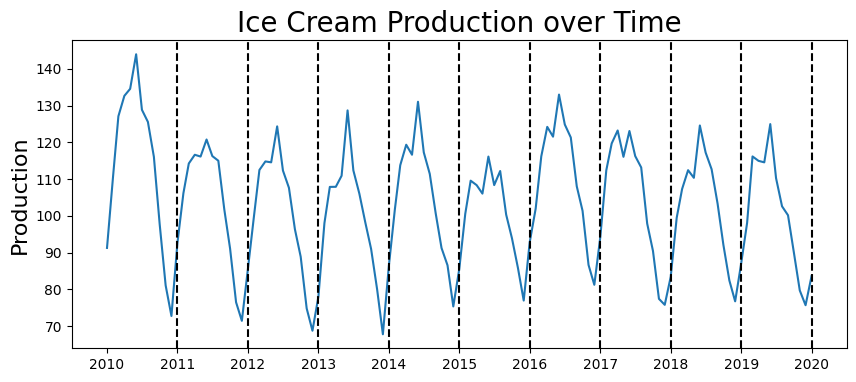

In [9]:
plt.figure(figsize=(10,4))

plt.plot(df_ice_cream.production)

plt.title('Ice Cream Production over Time' , fontsize = 20)

plt.ylabel('Production' , fontsize = 16)

for year in range(2011 , 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k' , linestyle ='--')

plt.show()

# ACF

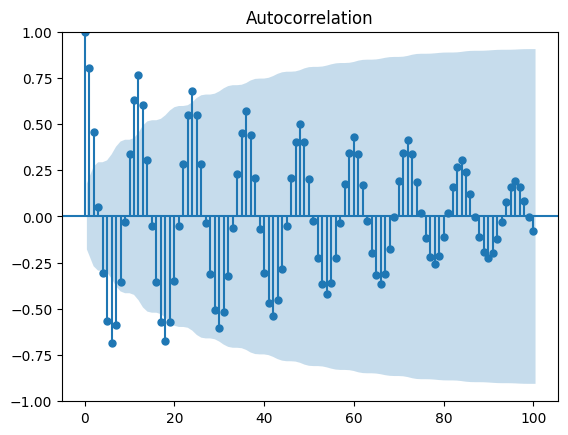

In [10]:
acf_plot = plot_acf(df_ice_cream.production , lags = 100)

BASED ON DECAYING ACF, WE ARE LIKELY DEALING WITH AN AUTO REGRESSIVE PROCESS 

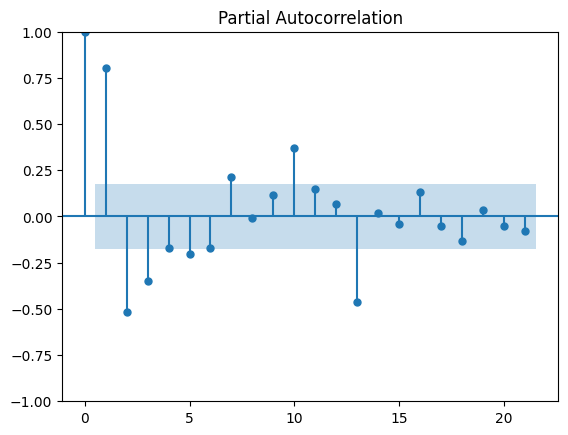

In [11]:
pacf_plot = plot_pacf(df_ice_cream.production)

BASED ON PACF, WE SHOULD START WITH AN AUTO REGRESSIVE MODEL WITH LAGS 1,2,3,10,13

# GET TRAINING AND TESTING SETS

In [14]:
from datetime import datetime

In [15]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

In [17]:
from datetime import timedelta 
from statsmodels.tsa.arima_model import ARMA
from time import time

train_data = df_ice_cream[:train_end]
test_data = df_ice_cream[train_end+ timedelta(days=1):test_end]

# Fit the AR Model

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Fri, 05 Jul 2024   AIC                            758.170
Time:                        21:47:48   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.7

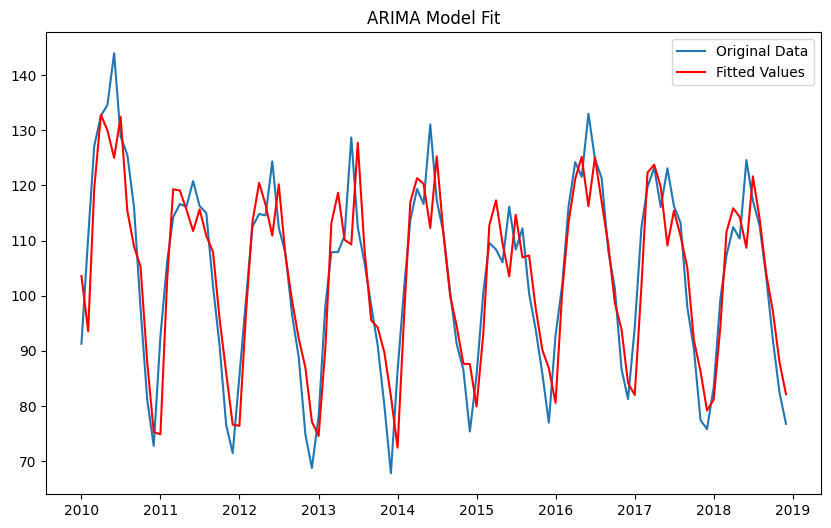

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(train_data, order=(3, 0, 0))
results = model.fit()

# Print summary of the model
print(results.summary())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Original Data')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.legend(loc='best')
plt.title('ARIMA Model Fit')
plt.show()



In [24]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-01-01     5.762551
2019-02-01     7.971090
2019-03-01    14.648628
2019-04-01     3.806251
2019-05-01    -2.499282
2019-06-01     6.834654
2019-07-01    -4.770283
2019-08-01    -6.747015
2019-09-01    -2.967977
2019-10-01    -8.016412
2019-11-01   -15.894087
2019-12-01   -19.990337
2020-01-01   -14.297269
dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


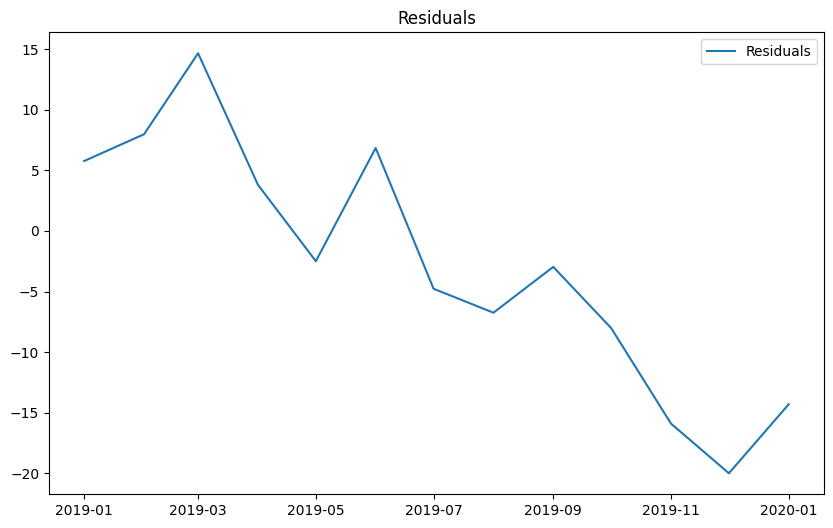

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming train_data and test_data are defined and are pandas Series with a DateTime index
train_data = df_ice_cream['production'][:'2018-12']
test_data = df_ice_cream['production']['2019-01':]

# Fit the model on training data
model = ARIMA(train_data, order=(3, 0, 0))
results = model.fit()

# Generate predictions on the test data
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = results.predict(start=pred_start_date, end=pred_end_date, typ='levels')

# Ensure test_data covers the same date range as predictions
# This assumes that test_data is a pandas Series with a DatetimeIndex
test_data = test_data.loc[predictions.index]

# Calculate residuals
residuals = test_data - predictions

# Print residuals to verify
print(residuals)

# Optionally, plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')
plt.show()


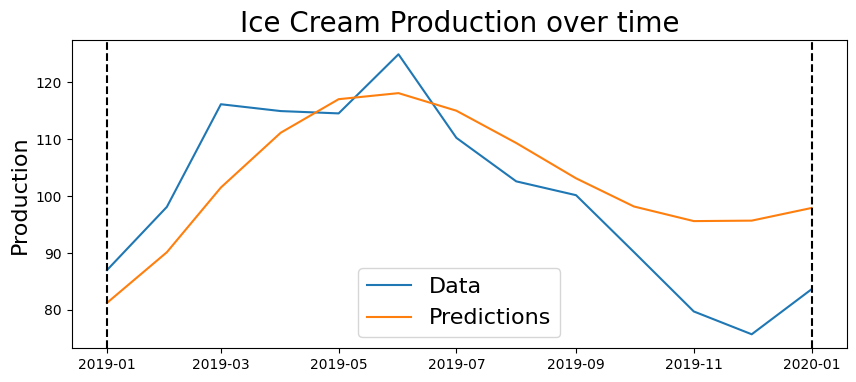

In [37]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data' , 'Predictions') , fontsize=16)

plt.title('Ice Cream Production over time' , fontsize=20)

plt.ylabel('Production' , fontsize=16)

for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--')

In [38]:
print('Mean Absolute Percent Error:' , round(np.mean(abs(residuals/test_data)), 4))

Mean Absolute Percent Error: 0.0958


In [39]:
print('Root Mean Squared Error:' , np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 10.291038018722595


HERE WE HAVE SEEN THE TIME LAG OF 3 

NOW AFTER LOOKING INTO PACF GRAPH, THERE WE CAN SEE THERE IS A HIGH PACF VALUE AT 13, SO LET'S

TAKE TIME LAG OF 13, WE WILL NOTICE THE CHANGES.

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-01-01     1.803446
2019-02-01    -2.750976
2019-03-01     8.728585
2019-04-01     1.353813
2019-05-01     0.848899
2019-06-01    -0.557165
2019-07-01   -10.018545
2019-08-01   -12.669158
2019-09-01    -5.206363
2019-10-01    -4.237920
2019-11-01    -5.718758
2019-12-01    -3.841440
2020-01-01    -3.865965
dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


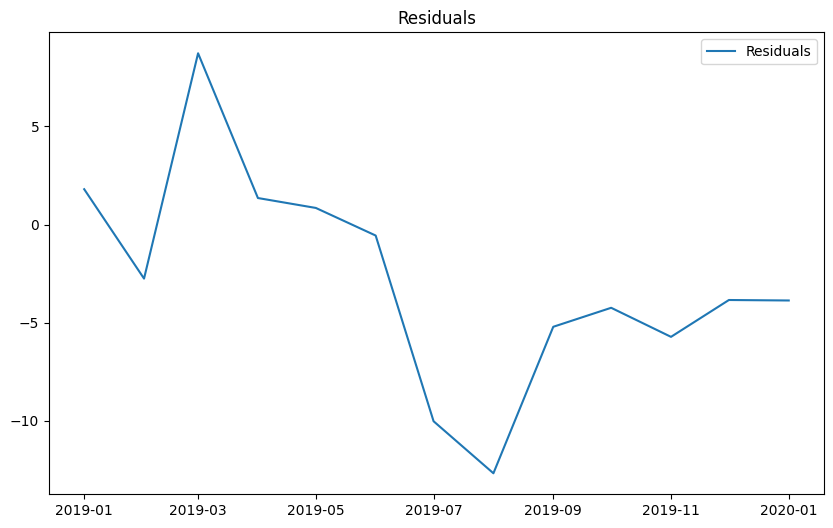

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming train_data and test_data are defined and are pandas Series with a DateTime index
train_data = df_ice_cream['production'][:'2018-12']
test_data = df_ice_cream['production']['2019-01':]

# Fit the model on training data
model = ARIMA(train_data, order=(13, 0, 0))
results = model.fit()

# Generate predictions on the test data
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = results.predict(start=pred_start_date, end=pred_end_date, typ='levels')

# Ensure test_data covers the same date range as predictions
# This assumes that test_data is a pandas Series with a DatetimeIndex
test_data = test_data.loc[predictions.index]

# Calculate residuals
residuals = test_data - predictions

# Print residuals to verify
print(residuals)

# Optionally, plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')
plt.show()


In [43]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                ARIMA(13, 0, 0)   Log Likelihood                -309.151
Date:                Sat, 06 Jul 2024   AIC                            648.303
Time:                        09:47:42   BIC                            688.535
Sample:                    01-01-2010   HQIC                           664.615
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.9878      1.633     63.660      0.000     100.786     107.189
ar.L1          0.8838      0.080     11.048      0.000       0.727       1.041
ar.L2          0.0283      0.115      0.245      0.8

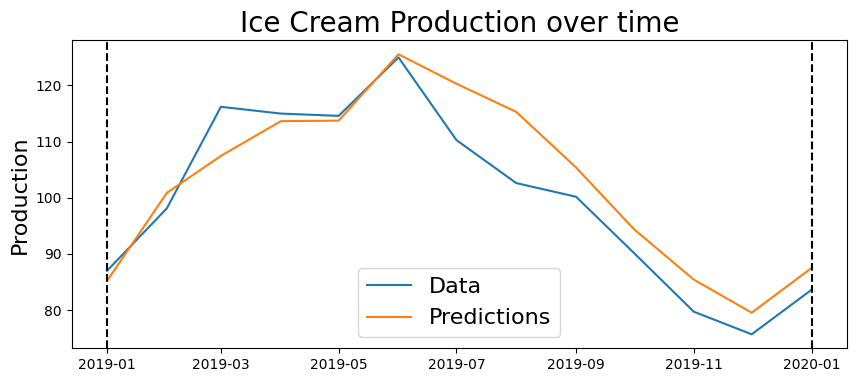

In [41]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data' , 'Predictions') , fontsize=16)

plt.title('Ice Cream Production over time' , fontsize=20)

plt.ylabel('Production' , fontsize=16)

for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--')

In [42]:
print('Mean Absolute Percent Error:' , round(np.mean(abs(residuals/test_data)), 4))

print('Root Mean Squared Error:' , np.sqrt(np.mean(residuals**2)))

Mean Absolute Percent Error: 0.0484
Root Mean Squared Error: 5.937001766176471


# ROLLING FORECAST ORIGIN:

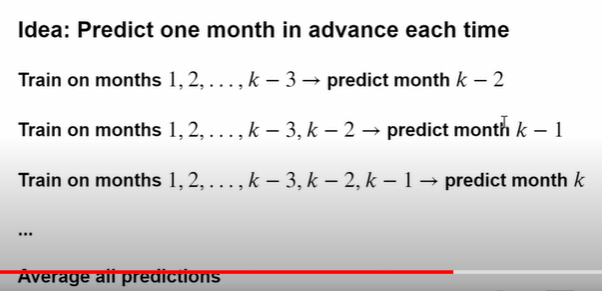

In [45]:
predictions_rolling = pd.Series()

for end_date in test_data.index:
    train_data = df_ice_cream[:end_date - timedelta(days=1)]
    model = ARIMA(train_data , order=(13,0,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    print(pred)
    predictions_rolling.loc[end_date]= pred.loc[end_date]

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Pyth

2019-01-01    85.195354
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-02-01    102.423626
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-03-01    105.010897
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-04-01    120.61674
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-05-01    116.185586
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-06-01    124.46856
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-07-01    119.144768
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-08-01    108.58886
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-09-01    92.206638
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-10-01    90.879758
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-11-01    84.00343
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-12-01    74.036522
Freq: MS, dtype: float64
2020-01-01    86.704795
Freq: MS, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
residuals_rolling = test_data - predictions_rolling

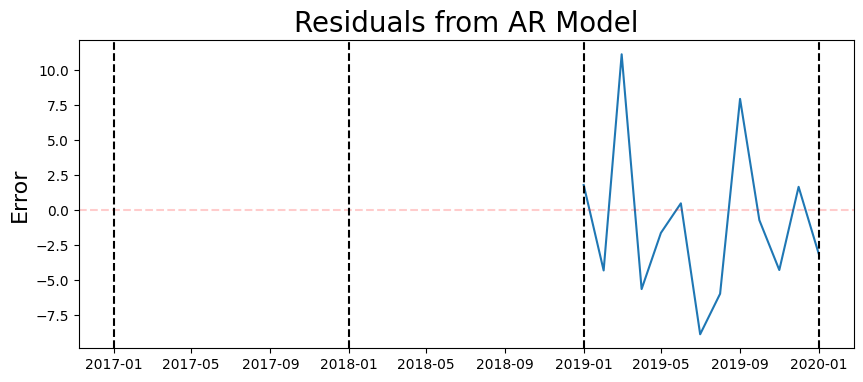

In [47]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model' , fontsize=20)
plt.ylabel('Error' , fontsize=16)
plt.axhline(0 , color='r' , linestyle='--' , alpha=0.2)
for year in range(2017,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--')

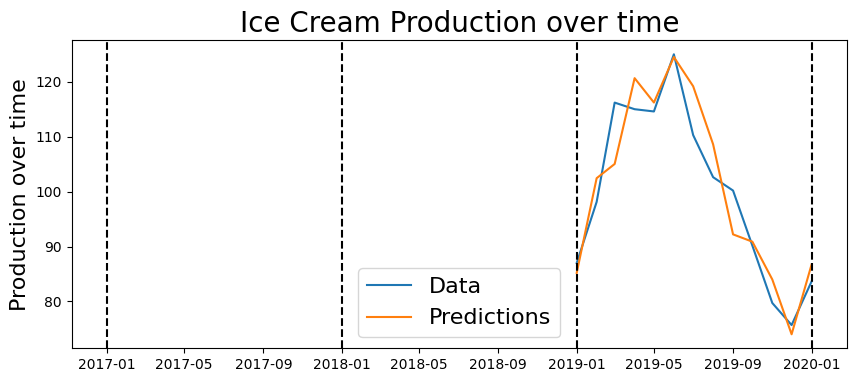

In [48]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Data' , 'Predictions') , fontsize=16)

plt.title('Ice Cream Production over time' , fontsize=20)
plt.ylabel('Production over time' , fontsize=16)

for year in range(2017,2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01') , color='k' , linestyle = '--')
    

In [49]:
print('Mean Absolute Percent Error:' , round(np.mean(abs(residuals/test_data)), 4))

print('Root Mean Squared Error:' , np.sqrt(np.mean(residuals**2)))

Mean Absolute Percent Error: 0.0484
Root Mean Squared Error: 5.937001766176471
